# Coffee Shop Sales

### Data Source: https://www.kaggle.com/datasets/ahmedabbas757/coffee-sales

#### Six months of daily transaction records (January-June 2023) for Maven Roasters, a fictitious coffee shop operating out of three NYC locations. Dataset includes the transaction date, timestamp and location, along with product-level details.

### Business Objective: How can the coffee shop improve operations and sales?
#### - Analytical Questions:
#### 1. *How have overall coffee shop sales trended over time?*
#### 2. *Which product categories and types have the most/least quantities sold?*
####      - *Is there a clear relationship between unit price and transaction quantity?*
#### 3. *Which product categories and types have driven the most revenue for the business?*
####      - *Is there a clear relationship between unit price and transaction sales?*
#### 4. *Which store locations generated the most and least revenue for the business?*

#### ***By analyzing these, management can acquire insights that will help with developing strategies to boost business operations and sales.***

### Additional Section: Predictive Modeling Using Multiple Linear Regression

#### - Employing an MLR Model to predict daily transaction sales from daily total transaction quantities and unit prices sold.

## Data Preprocessing

In [1]:
# Import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

In [2]:
# Loading coffee sales dataset to 'df'

df = pd.read_csv('coffee_shop_sales_2023.csv')

In [3]:
# Using .info() to view 'df' content such as column names, number of records and data types.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   transaction_id    149116 non-null  int64  
 1   transaction_date  149116 non-null  object 
 2   transaction_time  149116 non-null  object 
 3   transaction_qty   149116 non-null  int64  
 4   store_id          149116 non-null  int64  
 5   store_location    149116 non-null  object 
 6   product_id        149116 non-null  int64  
 7   unit_price        149116 non-null  float64
 8   product_category  149116 non-null  object 
 9   product_type      149116 non-null  object 
 10  product_detail    149116 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 12.5+ MB


In [4]:
# Using .head() to view the first 5 rows in 'df'

df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,1/1/2023,7:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,1/1/2023,7:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,1/1/2023,7:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,1/1/2023,7:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,1/1/2023,7:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


In [5]:
# Converting transaction_id, product_id and store_id to string objects so pandas won't calculate them as numerical values

df['transaction_id'] = df['transaction_id'].astype(str)
df['store_id'] = df['store_id'].astype(str)
df['product_id'] = df['product_id'].astype(str)

In [6]:
# Using .info() to ensure that the id columns have string object data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   transaction_id    149116 non-null  object 
 1   transaction_date  149116 non-null  object 
 2   transaction_time  149116 non-null  object 
 3   transaction_qty   149116 non-null  int64  
 4   store_id          149116 non-null  object 
 5   store_location    149116 non-null  object 
 6   product_id        149116 non-null  object 
 7   unit_price        149116 non-null  float64
 8   product_category  149116 non-null  object 
 9   product_type      149116 non-null  object 
 10  product_detail    149116 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 12.5+ MB


In [7]:
# Using functions .isnull().sum() chained together to get the number of null values in each column

df.isnull().sum()

transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
dtype: int64

- Since there are no null values in all columns, we do not need to drop any rows with null values

In [8]:
# Getting store location and product information to see how many unique values there are
# Setting store and product columns to a separate dataframe called 'product_df'

product_df = df[['store_location','product_id','product_category', 'product_type']]


# using a 'for-loop' to iterate through each column in 'product_df' to display the unique values in each

for col in product_df:
        print(f"Unique values in '{col}': {product_df[col].unique()}\n")

Unique values in 'store_location': ['Lower Manhattan' "Hell's Kitchen" 'Astoria']

Unique values in 'product_id': ['32' '57' '59' '22' '77' '28' '39' '58' '56' '33' '51' '87' '47' '79'
 '42' '61' '69' '40' '43' '76' '45' '71' '38' '26' '27' '29' '54' '55'
 '24' '60' '78' '44' '48' '23' '46' '25' '34' '36' '74' '53' '41' '37'
 '50' '72' '35' '70' '73' '75' '31' '49' '52' '30' '64' '12' '63' '6' '9'
 '65' '84' '19' '7' '1' '17' '10' '4' '15' '16' '3' '20' '83' '18' '21'
 '13' '11' '5' '2' '81' '14' '8' '82']

Unique values in 'product_category': ['Coffee' 'Tea' 'Drinking Chocolate' 'Bakery' 'Flavours' 'Loose Tea'
 'Coffee beans' 'Packaged Chocolate' 'Branded']

Unique values in 'product_type': ['Gourmet brewed coffee' 'Brewed Chai tea' 'Hot chocolate' 'Drip coffee'
 'Scone' 'Barista Espresso' 'Brewed Black tea' 'Brewed Green tea'
 'Brewed herbal tea' 'Biscotti' 'Pastry' 'Organic brewed coffee'
 'Premium brewed coffee' 'Regular syrup' 'Herbal tea' 'Gourmet Beans'
 'Organic Beans' 'Sugar f

In [9]:
# Checking for duplicates

df.loc[df.duplicated() == True]

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail


### No Need For Data Cleaning

#### - There are no duplicate values, misspellings and typos in unique values in each column
#### - No null values
#### - We can proceed to further using 'df'

### Further Preprocessing...

In [10]:
# Creating a new column for total sales during each transaction record
# Setting new colulmn as 'transaction_sales' by multiplying values in both 'transaction_qty' 'by unit_price'

df['transaction_sales'] = df['transaction_qty'] * df['unit_price']

In [11]:
# Using .describe() to get descriptive statistics values

df.describe()

,transaction_qty,unit_price,transaction_sales
count,149116.000000,149116.000000,149116.000000
mean,1.438276,3.382219,4.686367
std,0.542509,2.658723,4.227099
min,1.000000,0.800000,0.800000
25%,1.000000,2.500000,3.000000
50%,1.000000,3.000000,3.750000
75%,2.000000,3.750000,6.000000
max,8.000000,45.000000,360.000000


In [12]:
# Creating a new column called 'transaction_datetime' to combine 'transaction_date' and 'transaction_time' values into one
# 'transaction_datetime' column will be in datetime data type for time-series resampling and analysis

df['transaction_datetime'] = pd.to_datetime(df['transaction_date'].astype(str) + ' ' + df['transaction_time'])
df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,transaction_sales,transaction_datetime
0,1,1/1/2023,7:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.0,2023-01-01 07:06:11
1,2,1/1/2023,7:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2,2023-01-01 07:08:56
2,3,1/1/2023,7:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,9.0,2023-01-01 07:14:04
3,4,1/1/2023,7:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2.0,2023-01-01 07:20:24
4,5,1/1/2023,7:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2,2023-01-01 07:22:41


## **Question 1:** How have overall coffee shop sales trended over time?

- Implementing time-series data analysis and decomposition for this business question
- Setting a separate time-series dataframe for this analysis

In [13]:
# Making transaction_date as the index for the time-data df for resampling

time_data_df = df.set_index('transaction_datetime')

In [14]:
time_data_df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,transaction_sales
transaction_datetime,,,,,,,,,,,,
2023-01-01 07:06:11,1,1/1/2023,7:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.0
2023-01-01 07:08:56,2,1/1/2023,7:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2
2023-01-01 07:14:04,3,1/1/2023,7:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,9.0
2023-01-01 07:20:24,4,1/1/2023,7:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2.0
2023-01-01 07:22:41,5,1/1/2023,7:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2


### Analyzing Trends by Resampling

- The resample method in Pandas allows you to change the frequency of your time series data. This method is particularly useful for aggregating data by a specified time period, such as converting daily data into monthly or quarterly data, or even downsampling or upsampling data to a finer or coarser granularity.
- Operates on Pandas Series or DataFrame objects that have a datetime-like index. It groups data into regular time intervals (daily, monthly, quarterly, e.g.) and allows you to apply aggregation functions (ex: sum, mean, or count) to each group to summarize the data.

#### Daily

In [15]:
# Resampling to Daily Sales
# Resample rule set to 'D' for daily aggregation and .sum() to add up values to a total for each day

daily_sales = time_data_df['transaction_sales'].resample('D').sum()
daily_sales

transaction_datetime
2023-01-01    2508.20
2023-01-02    2403.35
2023-01-03    2565.00
2023-01-04    2220.10
2023-01-05    2418.85
               ...   
2023-06-26    5875.90
2023-06-27    5975.65
2023-06-28    4728.90
2023-06-29    4450.75
2023-06-30    5481.32
Freq: D, Name: transaction_sales, Length: 181, dtype: float64

#### Line Plots For Time-Series Data

 - We'll be using **line plots** to visualize time-series data as it is commonly used in this type of analysis
 - Line plots are ideal for this because it better captures patterns and trends as data moves through a span of time

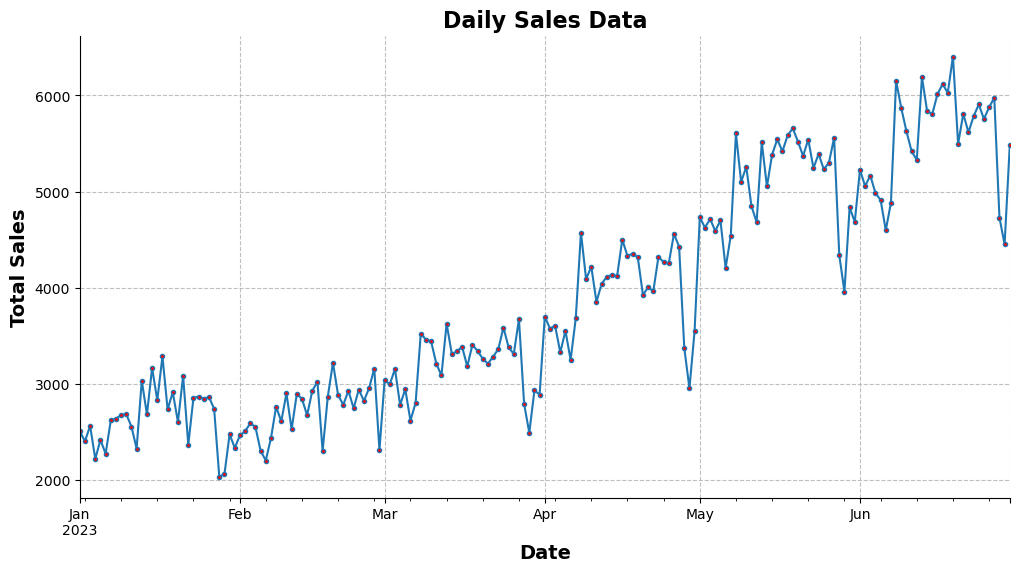

In [16]:
# Using a line plot to visualize Daily Sales data

plt.figure(figsize=(12,6))
daily_sales.plot(marker='o', markersize=3, markerfacecolor='red')

plt.title('Daily Sales Data', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14, fontweight='bold')
plt.ylabel('Total Sales', fontsize=14, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.8)

sns.despine()

#### Weekly

In [17]:
# Resampling to Weekly Sales
# Resample rule set to 'W' for daily aggregation and .sum() to add up values to a total for each week

weekly_sales = time_data_df['transaction_sales'].resample('W').sum()
weekly_sales

transaction_datetime
2023-01-01     2508.20
2023-01-08    17139.33
2023-01-15    19129.53
2023-01-22    19818.51
2023-01-29    18271.63
2023-02-05    17231.59
2023-02-12    18333.35
2023-02-19    19856.62
2023-02-26    20063.07
2023-03-05    20389.75
2023-03-12    22146.34
2023-03-19    23594.59
2023-03-26    23395.30
2023-04-02    22055.55
2023-04-09    26079.89
2023-04-16    28981.30
2023-04-23    29217.51
2023-04-30    27386.63
2023-05-07    32110.10
2023-05-14    36056.88
2023-05-21    38476.55
2023-05-28    36605.12
2023-06-04    33914.41
2023-06-11    37457.26
2023-06-18    41315.94
2023-06-25    40764.86
2023-07-02    26512.52
Freq: W-SUN, Name: transaction_sales, dtype: float64

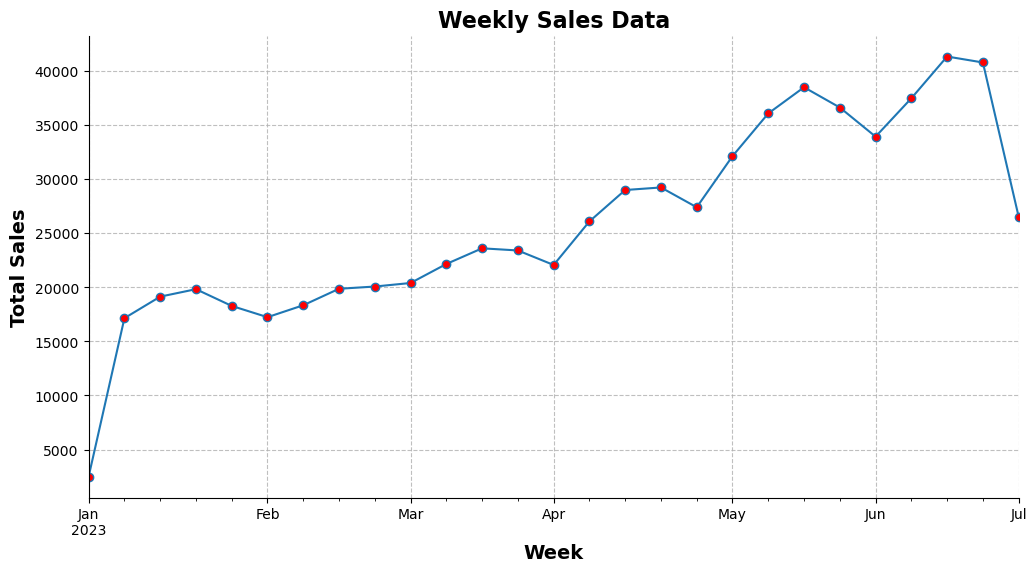

In [18]:
# Using a line plot to visualize Weekly Sales data

plt.figure(figsize=(12,6))
weekly_sales.plot(marker='o', markersize=6, markerfacecolor='red')

plt.title('Weekly Sales Data', fontsize=16, fontweight='bold')
plt.xlabel('Week', fontsize=14, fontweight='bold')
plt.ylabel('Total Sales', fontsize=14, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.8)

sns.despine()

### Time Decomposition

- The seasonal_decompose function is designed to separate the time series data into these constituent elements, making it easier to understand and forecast future data points. It does this by using moving averages and filtering techniques to isolate different parts of the time series.
- Purpose is to identify trend, spot seasonality and evaluate residuals

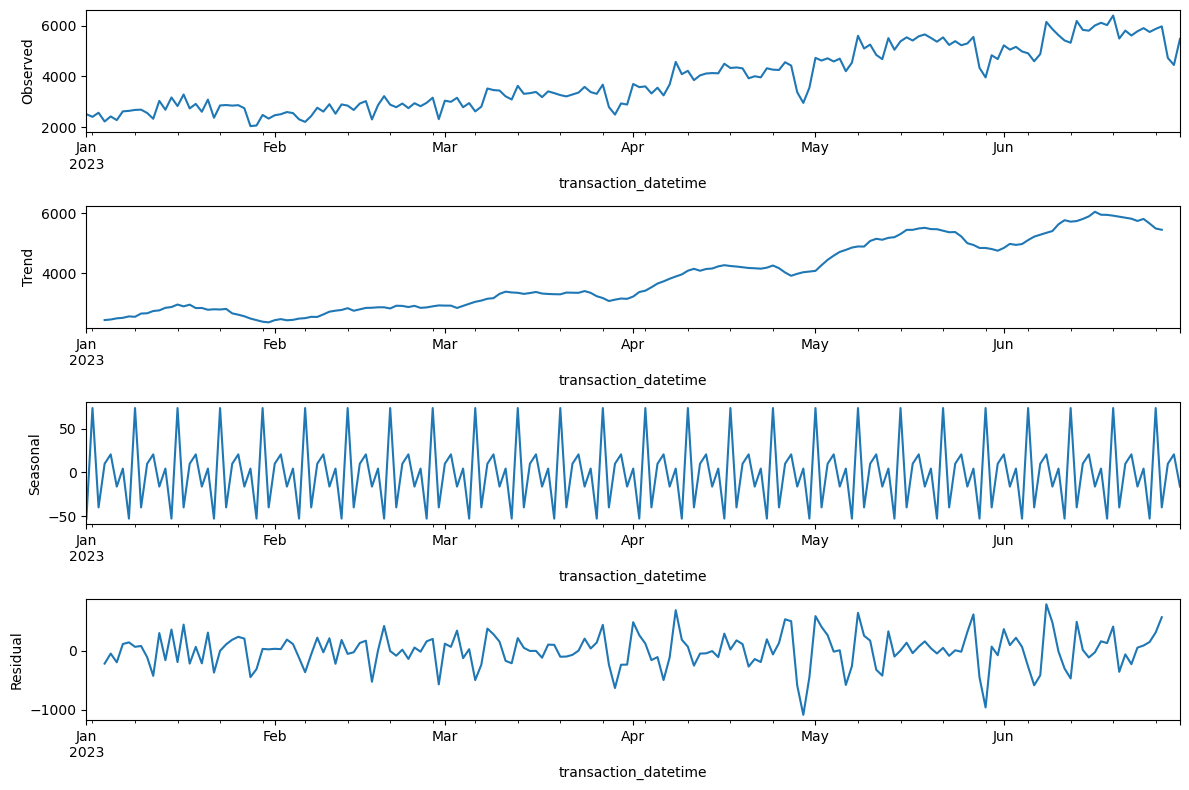

In [19]:
# Import seasonal_decompose from statsmodels python module

from statsmodels.tsa.seasonal import seasonal_decompose

# Using Daily Sales data to be decomposed

result = seasonal_decompose(daily_sales, model='additive', period=7)

# Plotting Daily time decomposition

fig, axes = plt.subplots(ncols=1,nrows=4,figsize=(12,8))

result.observed.plot(ax=axes[0])
axes[0].set_ylabel('Observed')

result.trend.plot(ax=axes[1])
axes[1].set_ylabel('Trend')

result.seasonal.plot(ax=axes[2])
axes[2].set_ylabel('Seasonal')

result.resid.plot(ax=axes[3])
axes[3].set_ylabel('Residual')


plt.tight_layout()

#### Hourly Sales Trends

- Looking at total and average hourly sales to see if there's a pattern depending on the hour of the day when it comes to sales

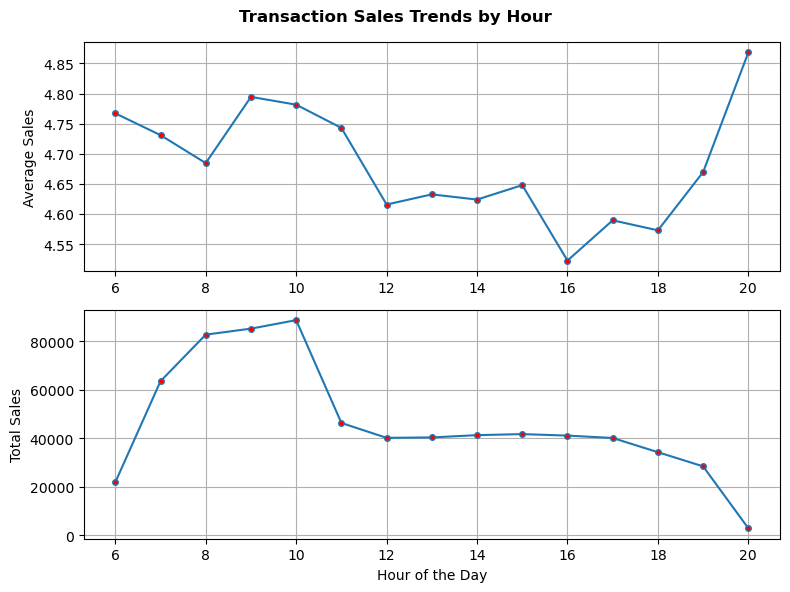

In [20]:
# Grabbing hour value from transaction datetime
df['hour'] = df['transaction_datetime'].dt.hour

# Using Aggregation Group By function
# Grouping by hour and calculating records' average and total sales for each hour
# Using the aggregation functions .sum() and .mean() to get the total and averages
hourly_sales_mean = df.groupby('hour')['transaction_sales'].mean()
hourly_sales_sum = df.groupby('hour')['transaction_sales'].sum()

# Create two subplots to compare average and total sales by hour
figure, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(8,6))

# Main titel for entire figure
figure.suptitle('Transaction Sales Trends by Hour', weight='bold')

# subplot for average sales
ax1.plot(hourly_sales_mean.index, hourly_sales_mean.values, marker='o',markerfacecolor='red', markersize=4, linestyle='-')
ax1.set_ylabel('Average Sales')
ax1.grid(True)

# subplot for total sales
ax2.plot(hourly_sales_sum.index, hourly_sales_sum.values, marker='o', markerfacecolor='red',markersize=4, linestyle='-')
ax2.set_ylabel('Total Sales')
ax2.set_xlabel('Hour of the Day')
ax2.grid(True)


plt.tight_layout()
plt.show()

### Findings/Observations:
Daily Sales Data:
- there are highs and lows in sales during each week
- the highs seem to happen during the beginning of each week
- the low points seem to happen towards the end of the weeks
- there's a steady overall trend of sales increasing from January to June; decrease happens towards end of June coming into July
- Sales may be decreasing after June because it's the start of summer
- People are less likely to buy coffee items because of the weather and maybe prefer establishments mainly selling cold drinks

Weekly Sales Data:
- weekly data also shows some peaks and lows during the weeks within each month in the data
- goes up during first weeks, peaks happens during the middle weeks of each month, goes down towards the end of each month
- there's a steady overall trend of sales increasing from January to June; decrease happens towards end of June coming into July
- Sales may be decreasing after June because it's the start of summer
- People are less likely to buy hot coffee because of the weather and maybe prefer establishments mainly selling cold drinks
  
Daily Sales Time-Decomposition:
- Decomposing the data shows the same pattern of highs and lows
- Highs are usually during the beginning of the weeks; Lows are towards the end of the weeks
- Trend shows a general increase and starts decreasing end of June
- Residuals or the noise indicate no bias or clear pattern

Hourly Trends:
- Overall average sales increase in the morning starting at 8am and the goes down after 10am, but increases after 4pm
- People typically buy coffee in the morning hours, but other sales such as bakery items or tea may be more popular towards end of day
- Total sales do show that sales increase in the morning hours and generally starts to decrease after around 10am

## **Question 2:** Which product categories and types have the most/least quantities sold?
### Accompanying Question: Is there a clear relationship between *unit price* and *transaction quantity*?

In [21]:
df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,transaction_sales,transaction_datetime,hour
0,1,1/1/2023,7:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.0,2023-01-01 07:06:11,7
1,2,1/1/2023,7:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2,2023-01-01 07:08:56,7
2,3,1/1/2023,7:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,9.0,2023-01-01 07:14:04,7
3,4,1/1/2023,7:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2.0,2023-01-01 07:20:24,7
4,5,1/1/2023,7:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2,2023-01-01 07:22:41,7


#### Grouping By Product Category

In [22]:
# Using aggregation group by function to group data into product categories

grouped_prod_cat = df.groupby('product_category')
grouped_prod_cat

In [23]:
# Getting total quantities sold for each product category with .sum()
# Using chaining sort_values() with ascending=False parameter so data shows descending values

total_cat_sold = grouped_prod_cat['transaction_qty'].sum().sort_values(ascending=False)
total_cat_sold

product_category
Coffee                89250
Tea                   69737
Bakery                23214
Drinking Chocolate    17457
Flavours              10511
Coffee beans           1828
Loose Tea              1210
Branded                 776
Packaged Chocolate      487
Name: transaction_qty, dtype: int64

#### Using Bar Charts for Comparisons
- We'll be using **bar charts** in the subsequent visualizations to highlight the differences in unique values
- Bar charts are ideal in this case because it shows size comparisons of values in bins

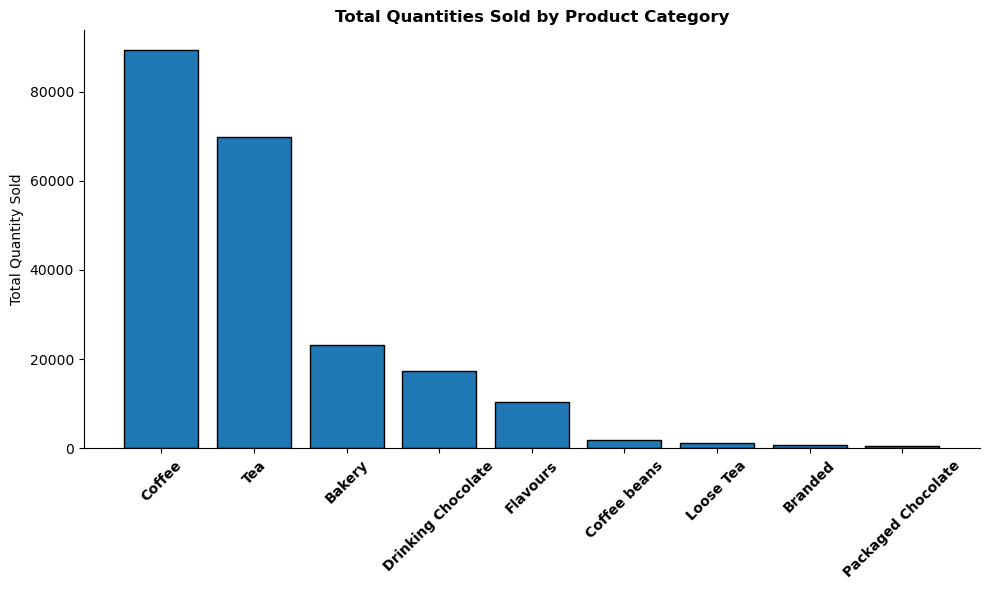

In [24]:
# PLotting Total Quantities Sold from the different product categories

plt.figure(figsize=(10, 6))
plt.bar(total_cat_sold.index, total_cat_sold.values, edgecolor='black')
plt.ylabel('Total Quantity Sold')
plt.title('Total Quantities Sold by Product Category', weight='bold')
plt.xticks(rotation=45,weight='bold')
plt.tight_layout()
sns.despine()
plt.show()

#### Now Grouping By Product Types
- We'll be narrowing down to the top 10 and bottom 10 product types to prevent overloading the visualizations
- Narrowing them down to certain types will help show which ones are actually selling a lot and not selling as much.

In [25]:
# Using groupby function to group by product types
# Aggregating group into the their transaction quantities sold totals using .sum()

grouped_prod_type = df.groupby('product_type')['transaction_qty'].sum()

# Sorting quantities
grouped_prod_type.sort_values(inplace=True)

# Getting top 10 product types to narrow down to most sold
top_10_prod_type_sold = grouped_prod_type.tail(10)
top_10_prod_type_sold

product_type
Scone                    10465
Premium brewed coffee    12431
Drip coffee              12891
Organic brewed coffee    13012
Brewed herbal tea        17328
Hot chocolate            17457
Brewed Black tea         17462
Barista Espresso         24943
Gourmet brewed coffee    25973
Brewed Chai tea          26250
Name: transaction_qty, dtype: int64

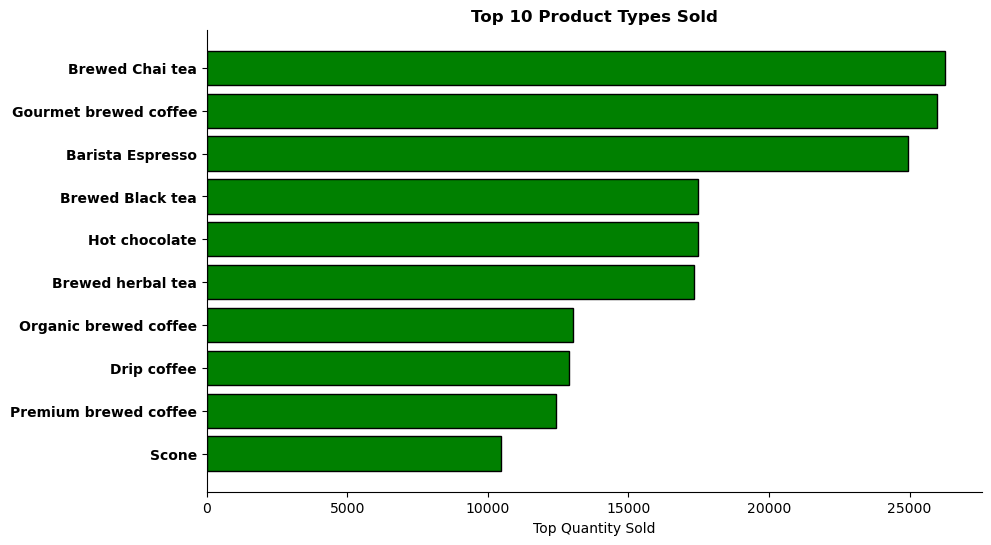

In [26]:
# Plotting Top 10 product types sold using bar chart

plt.figure(figsize=(10, 6))
plt.barh(top_10_prod_type_sold.index, top_10_prod_type_sold.values, edgecolor='black',color='green')
plt.xlabel('Top Quantity Sold')
plt.yticks(weight='bold')
plt.title('Top 10 Product Types Sold', weight='bold')


sns.despine()
plt.show()

In [27]:
# Getting bottom 10 product types to narrow down to least sold

bott_10_prod_type_sold = grouped_prod_type.head(10)
bott_10_prod_type_sold

product_type
Green beans           134
Green tea             159
House blend Beans     183
Organic Chocolate     221
Clothing              221
Drinking Chocolate    266
Black tea             303
Herbal tea            305
Espresso Beans        319
Gourmet Beans         366
Name: transaction_qty, dtype: int64

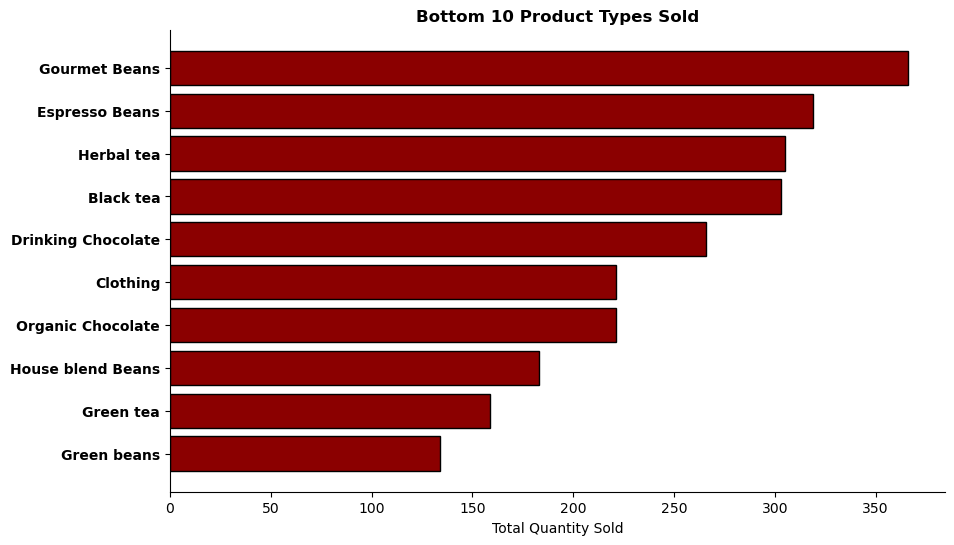

In [28]:
# Plotting Bottom 10 product types sold using bar chart

plt.figure(figsize=(10, 6))
plt.barh(bott_10_prod_type_sold.index, bott_10_prod_type_sold.values, edgecolor='black',color='darkred')
plt.xlabel('Total Quantity Sold')
plt.yticks(weight='bold')
plt.title('Bottom 10 Product Types Sold', weight='bold')


sns.despine()
plt.show()

#### Plotting Relationship Between Unit Price and Transaction Quantity

 - Seeing if there's a relationship between unit price and transaction quantity
 - Unit price might affect people's decision when considering the quantities to purchase
 - We'll be using a scatterplot with a regression line to visualize how data points are distributed
 - The regression line represents the equation of the line that best fits the relationship between the two variables
 - A **Scatter/Regression** plot is ideal in this case because it analyzes relationships between two variables

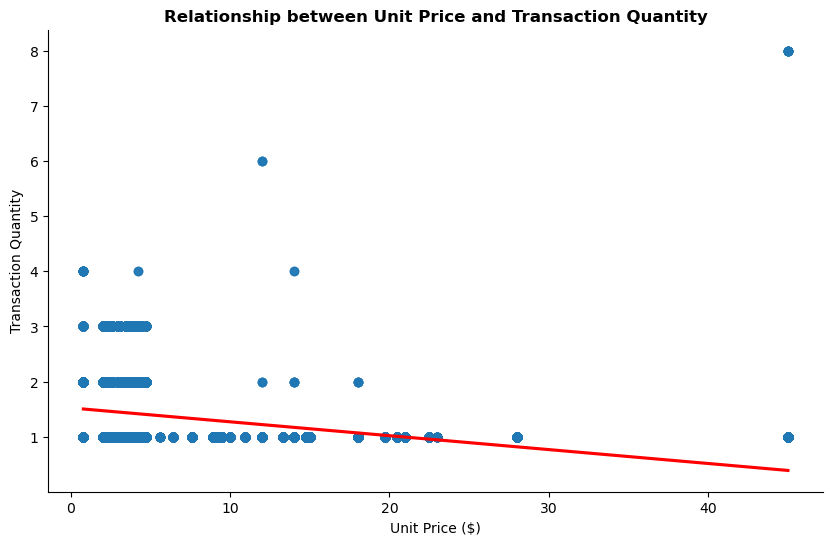

In [29]:
# Plotting relationship between Unit Price and Transaction Quantity using regression plot
plt.figure(figsize=(10, 6))

sns.regplot(data=df, x='unit_price', y='transaction_qty', line_kws=({'color':'red'}), ci=False)

plt.title('Relationship between Unit Price and Transaction Quantity', weight='bold')
plt.xlabel('Unit Price ($)')
plt.ylabel('Transaction Quantity')

# Clean up final result
sns.despine()

#### Findings/Observations:
Product Categories:
- Coffee items are of course the top selling category as it is the core of the business
- Followed by tea which is an alternative beverage people commonly choose besides coffee
- Bakery items is third which is sensible because people pair them with the top two beverage items

Top 10 Product Types:
- Green bar chart for top products shows the best selling items
- Surprisingly brewed chai tea is at the top just closely followed by gourmet brewed coffee for this span of time
- Top 10 comprises of mostly coffee and tea items, which reflects the top selling categories

Bottom 10 Product Types:
- Horizontal red bar chart shows least selling items
- Types are evenly spread between certain teas, coffee beans, merchandise and chocolate
- Might help the business to consider discontinuing some of these types to save costs

Regression Plot Unit Price vs. Transaction Quantity
- Regression line shows sort of a negative linear pattern, indicating a seemingly negative relationship between the two variables
- This may indicate that the bigger the unit price, the less quantity people would want to buy to lower their total purchase


## **Question 3:** Which product categories and types have driven the most revenue for the business?
### Accompanying Question: Is there a clear relationship between *unit price* and *transaction sales*?

 - Using the same methodology from question 2 with product category and types but for *transaction sales*

In [30]:
# Using aggregation group by function to group data by product categories
# Grouping by transaction sales and getting the totals by using .sum()

total_cat_sales = grouped_prod_cat['transaction_sales'].sum().sort_values(ascending=False)
total_cat_sales

product_category
Coffee                269952.45
Tea                   196405.95
Bakery                 82315.64
Drinking Chocolate     72416.00
Coffee beans           40085.25
Branded                13607.00
Loose Tea              11213.60
Flavours                8408.80
Packaged Chocolate      4407.64
Name: transaction_sales, dtype: float64

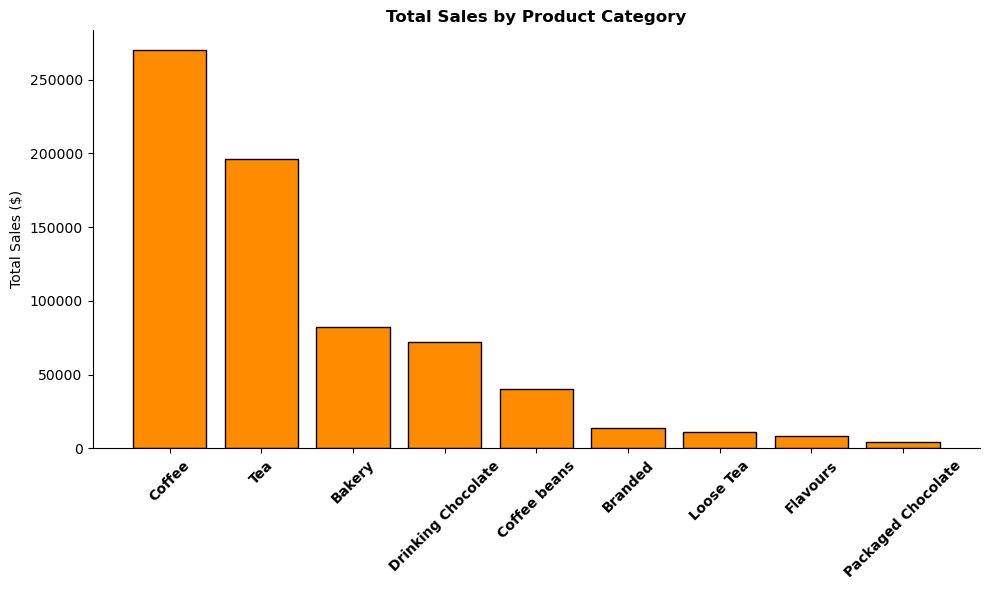

In [31]:
# Using bar charts again to compare total sales by product category

plt.figure(figsize=(10, 6))
plt.bar(total_cat_sales.index, total_cat_sales.values, edgecolor='black', color='darkorange')
plt.ylabel('Total Sales ($)')
plt.title('Total Sales by Product Category', weight='bold')
plt.xticks(rotation=45, weight='bold')
plt.tight_layout()
sns.despine()
plt.show()

In [32]:
# Grouping by product types and getting transaction sales using .sum()

grouped_prod_type_sales = df.groupby('product_type')['transaction_sales'].sum()

# Sort values
grouped_prod_type_sales.sort_values(inplace=True)

# Grabbing top 10 product types to narrow down to product types with most revenue
top_10_prod_type_sales = grouped_prod_type_sales.tail(10)
top_10_prod_type_sales

product_type
Drip coffee              31984.00
Scone                    36866.12
Organic brewed coffee    37746.50
Premium brewed coffee    38781.15
Brewed herbal tea        47539.50
Brewed Black tea         47932.00
Gourmet brewed coffee    70034.60
Hot chocolate            72416.00
Brewed Chai tea          77081.95
Barista Espresso         91406.20
Name: transaction_sales, dtype: float64

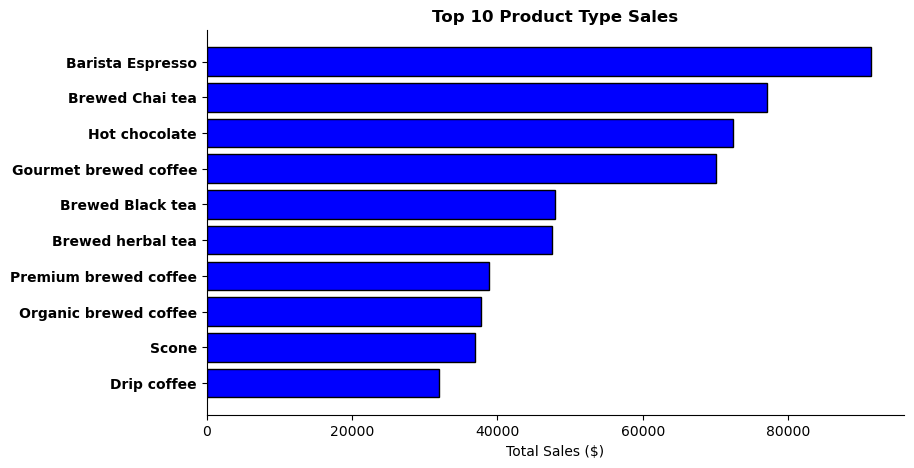

In [33]:
# Plotting with bar chart

plt.figure(figsize=(9, 5))
plt.barh(top_10_prod_type_sales.index, top_10_prod_type_sales.values, edgecolor='black',color='blue')
plt.xlabel('Total Sales ($)')
plt.yticks(weight='bold')
plt.title('Top 10 Product Type Sales', weight='bold')


sns.despine()
plt.show()

In [34]:
# Grabbing top 10 product types to narrow down to product types with least revenue

bott_10_prod_type_sales = grouped_prod_type_sales.head(10)
bott_10_prod_type_sales

product_type
Green beans           1340.00
Green tea             1470.75
Organic Chocolate     1679.60
Sugar free syrup      2324.00
Black tea             2711.85
Drinking Chocolate    2728.04
Herbal tea            2729.75
House blend Beans     3294.00
Chai tea              4301.25
Espresso Beans        5560.25
Name: transaction_sales, dtype: float64

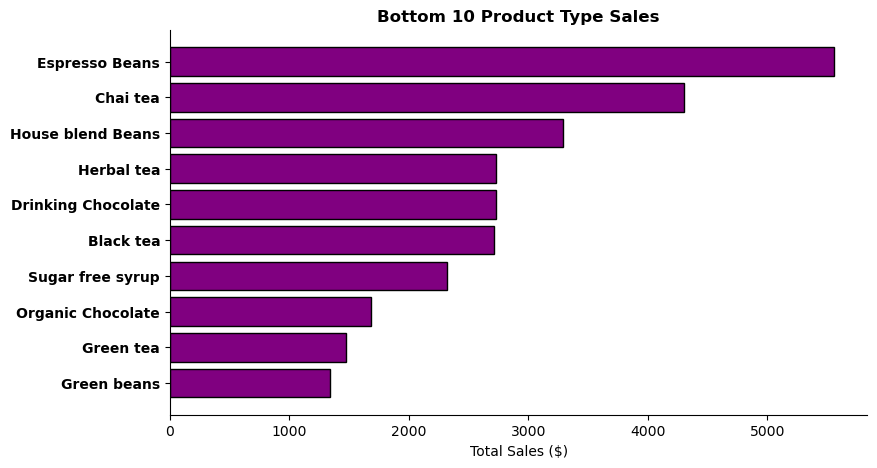

In [35]:
# Plotting with bar chart

plt.figure(figsize=(9, 5))
plt.barh(bott_10_prod_type_sales.index, bott_10_prod_type_sales.values, edgecolor='black',color='purple')
plt.xlabel('Total Sales ($)')
plt.yticks(weight='bold')
plt.title('Bottom 10 Product Type Sales', weight='bold')


sns.despine()
plt.show()

#### Plotting Relationship Between Unit Price and Transaction Sales

 - Seeing if there's a relationship between unit price and transaction sales
 - Unit price most likely has an influence in transaction sales as they indicate purchase pricing
 - We'll be using a scatterplot with a regression line again to visualize how data points are distributed
 - The regression line represents the equation of the line that best fits the relationship between the two variables
 - A **Scatter/Regression** plot is ideal in this case because it analyzes relationships between two variables

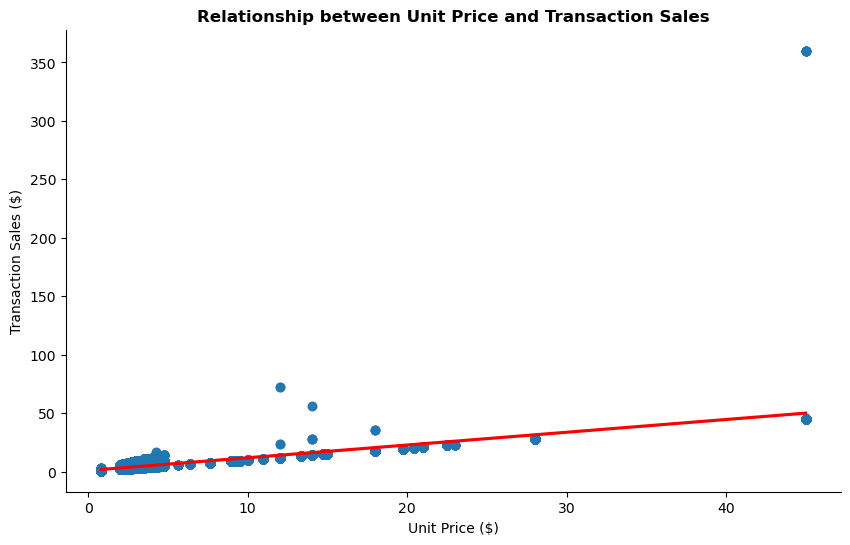

In [36]:
# Plotting relationship between Unit Price and Transaction Sales using regression plot
plt.figure(figsize=(10, 6))

sns.regplot(data=df, x='unit_price', y='transaction_sales', line_kws=({'color':'red'}), ci=False)

plt.title('Relationship between Unit Price and Transaction Sales', weight='bold')
plt.xlabel('Unit Price ($)')
plt.ylabel('Transaction Sales ($)')

# Clean up final result
sns.despine()

#### Findings/Observations:
Product Categories:
- Coffee items are of course again the category that makes the most revenue as it is the top selling
- Followed by again by tea and bakery items
- The total quantities analyzed above surely reflects the amount of revenue

Top 10 Product Types:
- Blue bar chart for top products shows the types making the most revenue for the business
- For most revenue in types, barista espresso beats brewed chai tea, which is the most selling in quantity
- Top 10 comprises of mostly coffee and tea items, which reflects the top selling and revenue-making categories

Bottom 10 Product Types:
- Horizontal purple bar chart shows the types making the least money for the business
- Types are evenly spread between certain teas, coffee beans, merchandise and chocolate again
- Might help the business to consider discontinuing some of these types to save costs
- Or have promotions to pair them with most popular items at discounted bundle prices to sell more of them

Regression Plot Unit Price vs. Transaction Sales
- Regression line shows sort of a positive linear pattern, indicating a seemingly positive relationship between the two variables
- This may indicate that the bigger the unit price, the more sales the shop makes as it gets multiplied by purchase quantities per transaction

## 4. Which store locations generated the most and least revenue for the business?

- We'll be looking at how each store is doing in overall sales
- Also doing comparisons to see if there are any differences between them

#### Box Plot
- Using a box plot for a quick visualization on the distribution between each store's quantities sold
- Box plots are good to use in this case because they can show outliers and percentile/quartile values

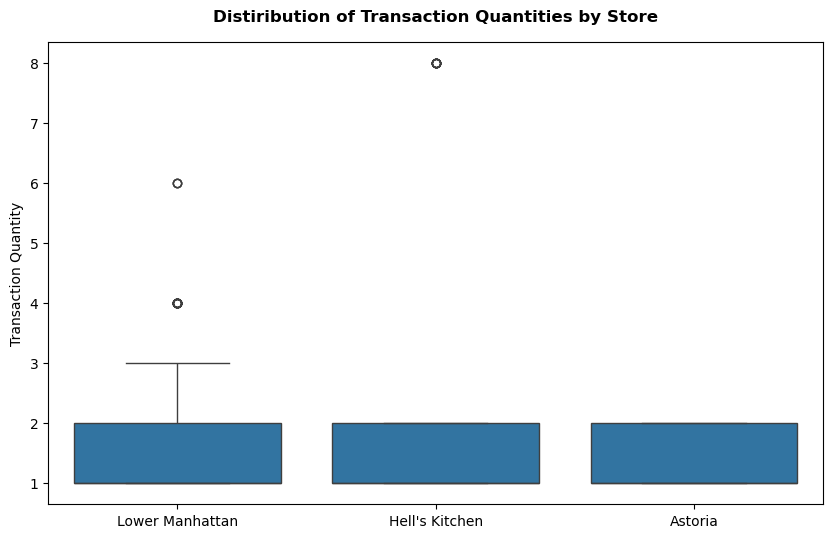

In [37]:
# Using box plot

plt.figure(figsize=(10, 6))

sns.boxplot(data=df, y='transaction_qty', x='store_location')
plt.title('Distiribution of Transaction Quantities by Store', weight='bold', pad=15)
plt.ylabel('Transaction Quantity')
plt.xlabel(None)
plt.show()

- Filtering 'df' to each store's associated records
- Setting separate dataframes for each store
- Setting transaction datetime as their indexes for time-series plotting and comparison

In [38]:
# Using pandas 'df' conditions to filter each store's data
# 'set_index()' to for setting transaction_datetime as dataframe index

lwr_man_df = df[df['store_location'] == 'Lower Manhattan']
lwr_man_df.set_index('transaction_datetime', inplace=True)

hk_df = df[df['store_location'] == "Hell's Kitchen"]
hk_df.set_index('transaction_datetime', inplace=True)

astor_df = df[df['store_location'] == "Astoria"]
astor_df.set_index('transaction_datetime', inplace=True)

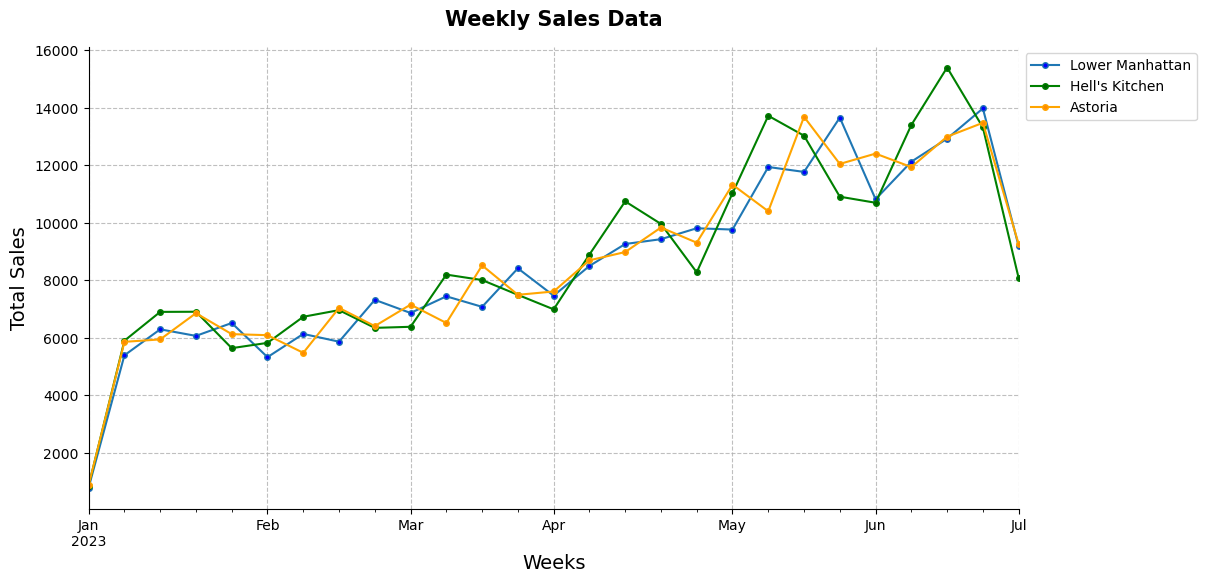

In [39]:
# Using resampling again to get Weekly Sales data for each store
lwr_man_wk_sales = lwr_man_df['transaction_sales'].resample('W').sum()
hk_wk_sales = hk_df['transaction_sales'].resample('W').sum()
astor_wk_sales = astor_df['transaction_sales'].resample('W').sum()

# Plotting line plots for each store in one figure
# Each plot will be displayed in one figure with distinctive colors for comparison
plt.figure(figsize=(12,6))
lwr_man_wk_sales.plot(marker='o', markersize=4, markerfacecolor='blue', label='Lower Manhattan')
hk_wk_sales.plot(marker='o', markersize=4, markerfacecolor='darkgreen', color='green', label="Hell's Kitchen")
astor_wk_sales.plot(marker='o', markersize=4, markerfacecolor='darkorange', color='orange', label='Astoria')

plt.title('Weekly Sales Data', fontsize=15, fontweight='bold', pad=15)
plt.xlabel('Weeks', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.8)
plt.legend(bbox_to_anchor=(1,1))

sns.despine()

In [40]:
# Using groupby function to aggregate data by store location

grouped_store = df.groupby('store_location')

In [41]:
# Using .sum() function to get aggregate sales and quantities sold data for each store

store_qty_sold = grouped_store['transaction_qty'].sum()
store_sales = grouped_store['transaction_sales'].sum()

In [42]:
store_qty_sold

store_location
Astoria            70991
Hell's Kitchen     71737
Lower Manhattan    71742
Name: transaction_qty, dtype: int64

In [43]:
store_sales

store_location
Astoria            232243.91
Hell's Kitchen     236511.17
Lower Manhattan    230057.25
Name: transaction_sales, dtype: float64

C:\Users\adamc\AppData\Local\Temp\ipykernel_20236\3825255060.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), weight='bold')
C:\Users\adamc\AppData\Local\Temp\ipykernel_20236\3825255060.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_yticklabels(ax2.get_yticklabels(), weight='bold')


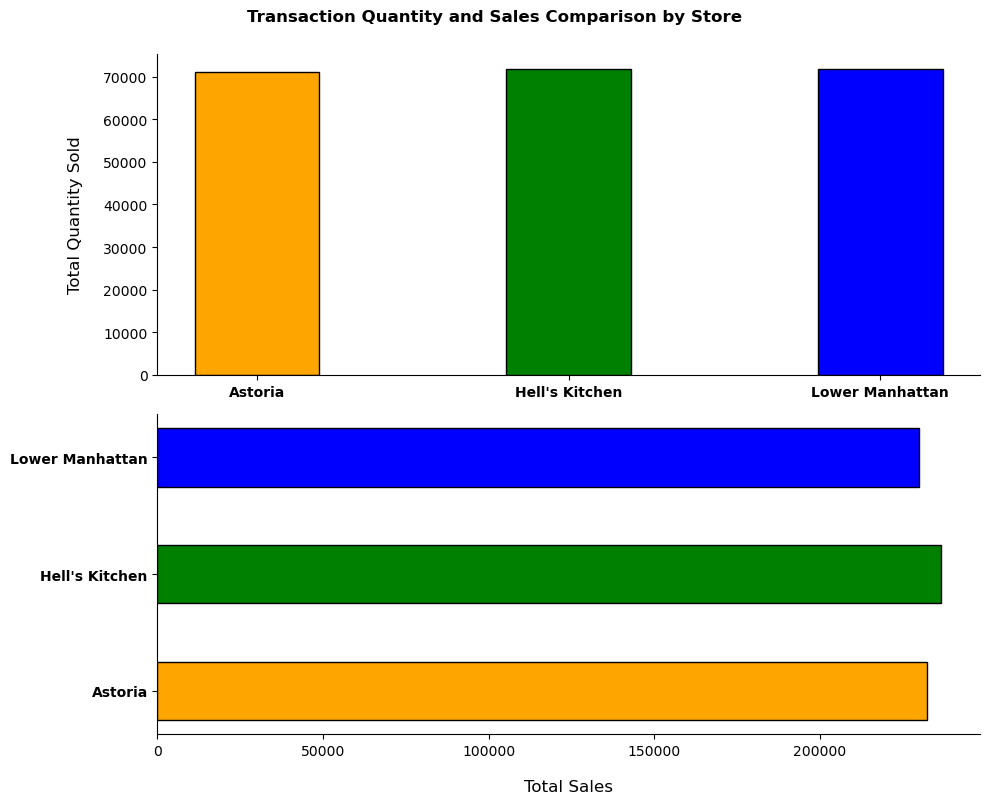

In [44]:
# Create two subplots to compare total quantities sold and sales by store

figure, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10,8))

figure.suptitle('Transaction Quantity and Sales Comparison by Store', weight='bold', y=1)

my_colors = ['orange','green','blue']

# subplot for total quantities sold
ax1.bar(store_qty_sold.index, store_qty_sold.values, color=my_colors, edgecolor='black', width=0.4)
ax1.set_ylabel('Total Quantity Sold', labelpad=15, fontsize=12)
ax1.set_xticklabels(ax1.get_xticklabels(), weight='bold')


# subplot for total sales
ax2.barh(store_sales.index, store_sales.values, color=my_colors, edgecolor='black', height=0.5)
ax2.set_xlabel('Total Sales', labelpad=15, fontsize=12)
ax2.set_yticklabels(ax2.get_yticklabels(), weight='bold')


plt.tight_layout()
sns.despine()
plt.show()

#### Findings/Observations:
Differences in Transaction Quantities:
- All three stores have the same median quantities sold when it comes to transactions
- Lower Manhattan and Hell's Kitchen locations do have outliers

Weekly Sales Data:
- All three locations mirror the same weekly sales trend as the overall data
- They all generally track same patterns over time
- Hell's Kitchen location has the highest peak in sales that happens in June right before the decrease that happens afterwards going into summer

Comparing Transactions:
- All three are on par when it comes to total quantities sold and sales or revenue
- Hell's Kitchen does lead in both but the differences are very minute considering the scale of the amounts
- Overall, all three seem to perform closely similar in operations and sales

## Additional Section: Predictive Modeling Using Multiple Linear Regression

### - Implementing an MLR Model to predict daily transaction sales

In [45]:
# Importing required modules for predictive modeling

from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [46]:
df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,transaction_sales,transaction_datetime,hour
0,1,1/1/2023,7:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.0,2023-01-01 07:06:11,7
1,2,1/1/2023,7:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2,2023-01-01 07:08:56,7
2,3,1/1/2023,7:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,9.0,2023-01-01 07:14:04,7
3,4,1/1/2023,7:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2.0,2023-01-01 07:20:24,7
4,5,1/1/2023,7:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2,2023-01-01 07:22:41,7


In [47]:
# Using groupby function to group data by Day from transaction datetime values
# Using dt.to_period() to indicate the interval to group in datetime, similar to resampling

grouped_day = df.groupby(df['transaction_datetime'].dt.to_period('D'))

# Setting a separate new dataframe for the model from the grouped object by Day
# Using .sum() to get daily total transaction quantities sold, total unit prices sold, total transaction sales
model_df = grouped_day[['transaction_qty','unit_price','transaction_sales']].sum().reset_index()

# Removing transaction_datetime column since we will not need it for modeling
model_df.drop(columns='transaction_datetime',inplace=True)
model_df

,transaction_qty,unit_price,transaction_sales
0,802,1731.80,2508.20
1,790,1743.95,2403.35
2,823,1826.60,2565.00
3,726,1533.40,2220.10
4,778,1715.35,2418.85
...,...,...,...
176,1837,3980.45,5875.90
177,1962,4010.05,5975.65
178,1531,3335.75,4728.90
179,1429,3162.35,4450.75


In [48]:
# Querying descriptive statistics from model_df

model_df.describe()

,transaction_qty,unit_price,transaction_sales
count,181.000000,181.000000,181.000000
mean,1184.917127,2786.425580,3860.841602
std,358.869597,867.464052,1187.822030
min,645.000000,1437.800000,2037.100000
25%,878.000000,2060.600000,2853.150000
50%,1099.000000,2574.160000,3523.260000
75%,1512.000000,3487.190000,4850.060000
max,1962.000000,4918.060000,6403.910000


In [49]:
# Using .corr() to get correlation coefficient matrix values for the three variables

model_df.corr()

,transaction_qty,unit_price,transaction_sales
transaction_qty,1.000000,0.956472,0.983932
unit_price,0.956472,1.000000,0.983617
transaction_sales,0.983932,0.983617,1.000000


### Getting X, y features & Splitting the Dataset Into Train and Test Sets

In [50]:
# Define the independent variable (X) and dependent variable (y)
# transaction quantity and unit price for X, as the response variables
# transaction sales for y, as the predictor variable

X = model_df[['transaction_qty','unit_price']]
y = model_df['transaction_sales']

In [51]:
# Splitting data into test and train sets
# Using a 70/30 split: 70% train-data, 30% test-data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Creating & Fitting the Model

In [52]:
# Add a constant to the X-train features

X_train = sm.add_constant(X_train)


# Create a linear regression model
# Using .fit() to fit the training data to the model

model = sm.OLS(y_train,X_train).fit()

In [53]:
# .summary() displays the model's characteristics
# shows important values such as R2

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      transaction_sales   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     5458.
Date:                Wed, 01 May 2024   Prob (F-statistic):          7.71e-121
Time:                        21:45:06   Log-Likelihood:                -788.92
No. Observations:                 126   AIC:                             1584.
Df Residuals:                     123   BIC:                             1592.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -31.0808     39.500     

- ***Summary shows a significantly large R2 value, which indicates a strong relationship between X and y variables***

### Making Predictions

In [54]:
# Add constant to X-test
X_test = sm.add_constant(X_test)

In [55]:
# Using .predict() and inputting the X-test data to make predictions based off that
# Setting a variable to store predictions

predictions = model.predict(X_test)
predictions

19     2681.550465
42     2918.734326
153    5243.808741
78     3373.022778
145    5223.119438
15     2887.647209
24     2790.747905
68     3496.172610
113    4211.936992
118    3000.820132
93     3378.837580
159    5800.955839
69     3263.024911
142    5146.351595
45     2936.064179
16     2651.926932
51     2737.336904
125    4284.275395
96     3720.497615
56     2898.007188
97     4512.828929
120    4768.819616
143    5300.071671
30     2267.011401
9      2753.276819
172    5503.853662
60     3020.538758
18     2915.963914
148    4043.997668
173    5649.514854
109    4008.770078
55     2759.948797
140    5266.321324
126    4635.205599
66     3527.297776
29     2379.216148
117    3440.702871
65     2855.362408
67     3409.750993
31     2471.639244
12     3001.762963
41     2590.164887
124    4771.278905
100    3974.469691
161    5594.165265
132    5501.241231
90     3746.958572
38     2786.334249
169    6439.185278
115    4459.787179
171    5741.394460
156    4680.867246
2      2597.

In [56]:
# Importing necessary functions for model evaluation

from sklearn.metrics import mean_absolute_error, mean_squared_error

In [57]:
# Getting the different types of error values
# Inputting the y-test data and predictions to calculate error values

MAE = mean_absolute_error(y_test, predictions)
MSE = mean_squared_error(y_test, predictions)
RMSE = np.sqrt(MSE)

print(f"MAE: {MAE}")
print(f"MSE: {MSE}")
print(f"RMSE: {RMSE}")

MAE: 73.38735327147945
MSE: 12409.259931037981
RMSE: 111.39685781492214


### Evaluation:
- Focusing on MAE and RMSE since they are in the same units as the original data
- MAE score indicates that the average absolute difference between the predictions and actuals are about **73**
- RMSE score tells us that the average square-rooted difference between the predictions and actuals are about **111**
- Overall the scores seem good and not far off considering values' scale, meaning the model created is performing decently

### Independence of Errors Check (Residual Plot):

- Even though the residual points are concentrated towards a certain range within 0, it doesn't seem to show a clear pattern
- Aside from outliers in the residual plot, the points seem scattered if you focus on just the range within 0
- Further data may be needed in order to get a more accurate model and better looking residual plot

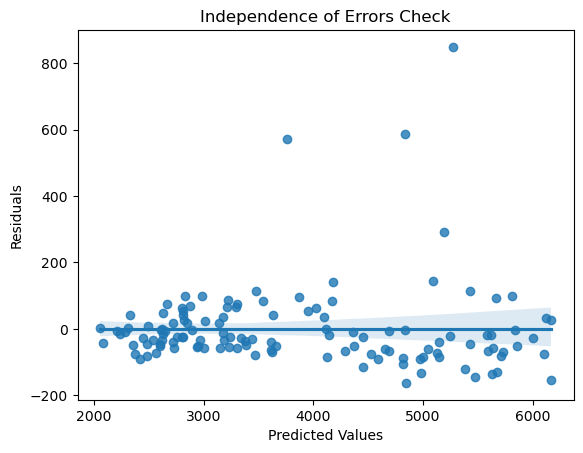

In [58]:
# Using .resid to get the residual points of the model
residuals = model.resid

# Plotting residual poitnts and predicted values in regression plot to perform the check
sns.regplot(x=model.predict(), y=residuals)

plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Independence of Errors Check')
plt.show()